<h1>Data mining Project</h1>
<p>Réalisé par : Ayoub Laarouchi</p>
<p>Study on los angeles crime data set from the official lacity data website</p>

In [1]:
# The website for the data https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

<h2>Imports</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None

<h2>Data Understanding</h2>
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Division_Record_Number</td>
      <td>Official file number made up of a 2 digit year, area ID, and 5 digits</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Reported_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Time</td>
      <td>In 24 hour military time.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Area_ID</td>
      <td>The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Area_Name</td>
      <td>The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Report_District_Number</td>
      <td>A four-digit code that represents a sub-area within a Geographic Area.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Part_Type</td>
      <td>Number</td>
      <td></td>
    </tr>
    <tr>
      <td>Crime_Code</td>
      <td>Indicates the crime committed. (Same as Primary_Crime_Code)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Primary_Crime_Code_Description</td>
      <td>Defines the Crime Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Modus_Operandi</td>
      <td>Modus Operandi: Activities associated with the suspect in commission of the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Age</td>
      <td>Two character numeric</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Sex</td>
      <td>F - Female M - Male X - Unknown</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Descent</td>
      <td>A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Premise_Code</td>
      <td>The type of structure, vehicle, or location where the crime took place.</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Premise_Description</td>
      <td>Defines the Premise Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Used_Code</td>
      <td>The type of weapon used in the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Description</td>
      <td>Defines the Weapon Used Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Case_Status</td>
      <td>Status of the case. (IC is the default)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Status_Description</td>
      <td>Defines the Status Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Primary_Crime_Code</td>
      <td>Indicates the primary and most serious crime committed.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_1</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_2</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_3</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Location</td>
      <td>Street address of crime incident rounded to the nearest hundred block to maintain anonymity.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Cross_Street</td>
      <td>Cross Street of rounded Address</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Latitude</td>
      <td>Latitude</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Longitude</td>
      <td>Longitude</td>
      <td>Number</td>
    </tr>
  </tbody>
</table>


In [3]:
data  = pd.read_csv("data1.csv")
data.columns =  ['Division_Record_Number' , 'Reported_Date', 'Occurred_Date', 'Occurred_Time', 'Area_ID', 'Area_Name', 'Report_District',
              'Part_Type', 'Crime_Code', 'Primary_Crime_Code_Description', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex',
              'Victim_Descent', 'Premise_Code', 'Premise_Desc', 'Weapon_Used_Code', 'Weapon_Desc',
              'Case_Status', 'Status_Desc', 'Primary_Crime_Code', 'Secondary_Crime_Code_1',
              'Secondary_Crime_Code_2', 'Secondary_Crime_Code_3', 'Location', 'Cross_Street', 'Latitude', 'Longitude']
data = data.set_index(["Division_Record_Number"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910707 entries, 190326475 to 240104953
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Reported_Date                   910707 non-null  object 
 1   Occurred_Date                   910707 non-null  object 
 2   Occurred_Time                   910707 non-null  int64  
 3   Area_ID                         910707 non-null  int64  
 4   Area_Name                       910707 non-null  object 
 5   Report_District                 910707 non-null  int64  
 6   Part_Type                       910707 non-null  int64  
 7   Crime_Code                      910707 non-null  int64  
 8   Primary_Crime_Code_Description  910707 non-null  object 
 9   Modus_Operandi                  783696 non-null  object 
 10  Victim_Age                      910707 non-null  int64  
 11  Victim_Sex                      789672 non-null  object 
 12  Victim_Des

In [4]:
data.head(5)

,Reported_Date,Occurred_Date,Occurred_Time,Area_ID,Area_Name,Report_District,Part_Type,Crime_Code,Primary_Crime_Code_Description,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Desc,Weapon_Used_Code,Weapon_Desc,Case_Status,Status_Desc,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Location,Cross_Street,Latitude,Longitude
Division_Record_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


<h2>Data pre-processing</h2>

[]

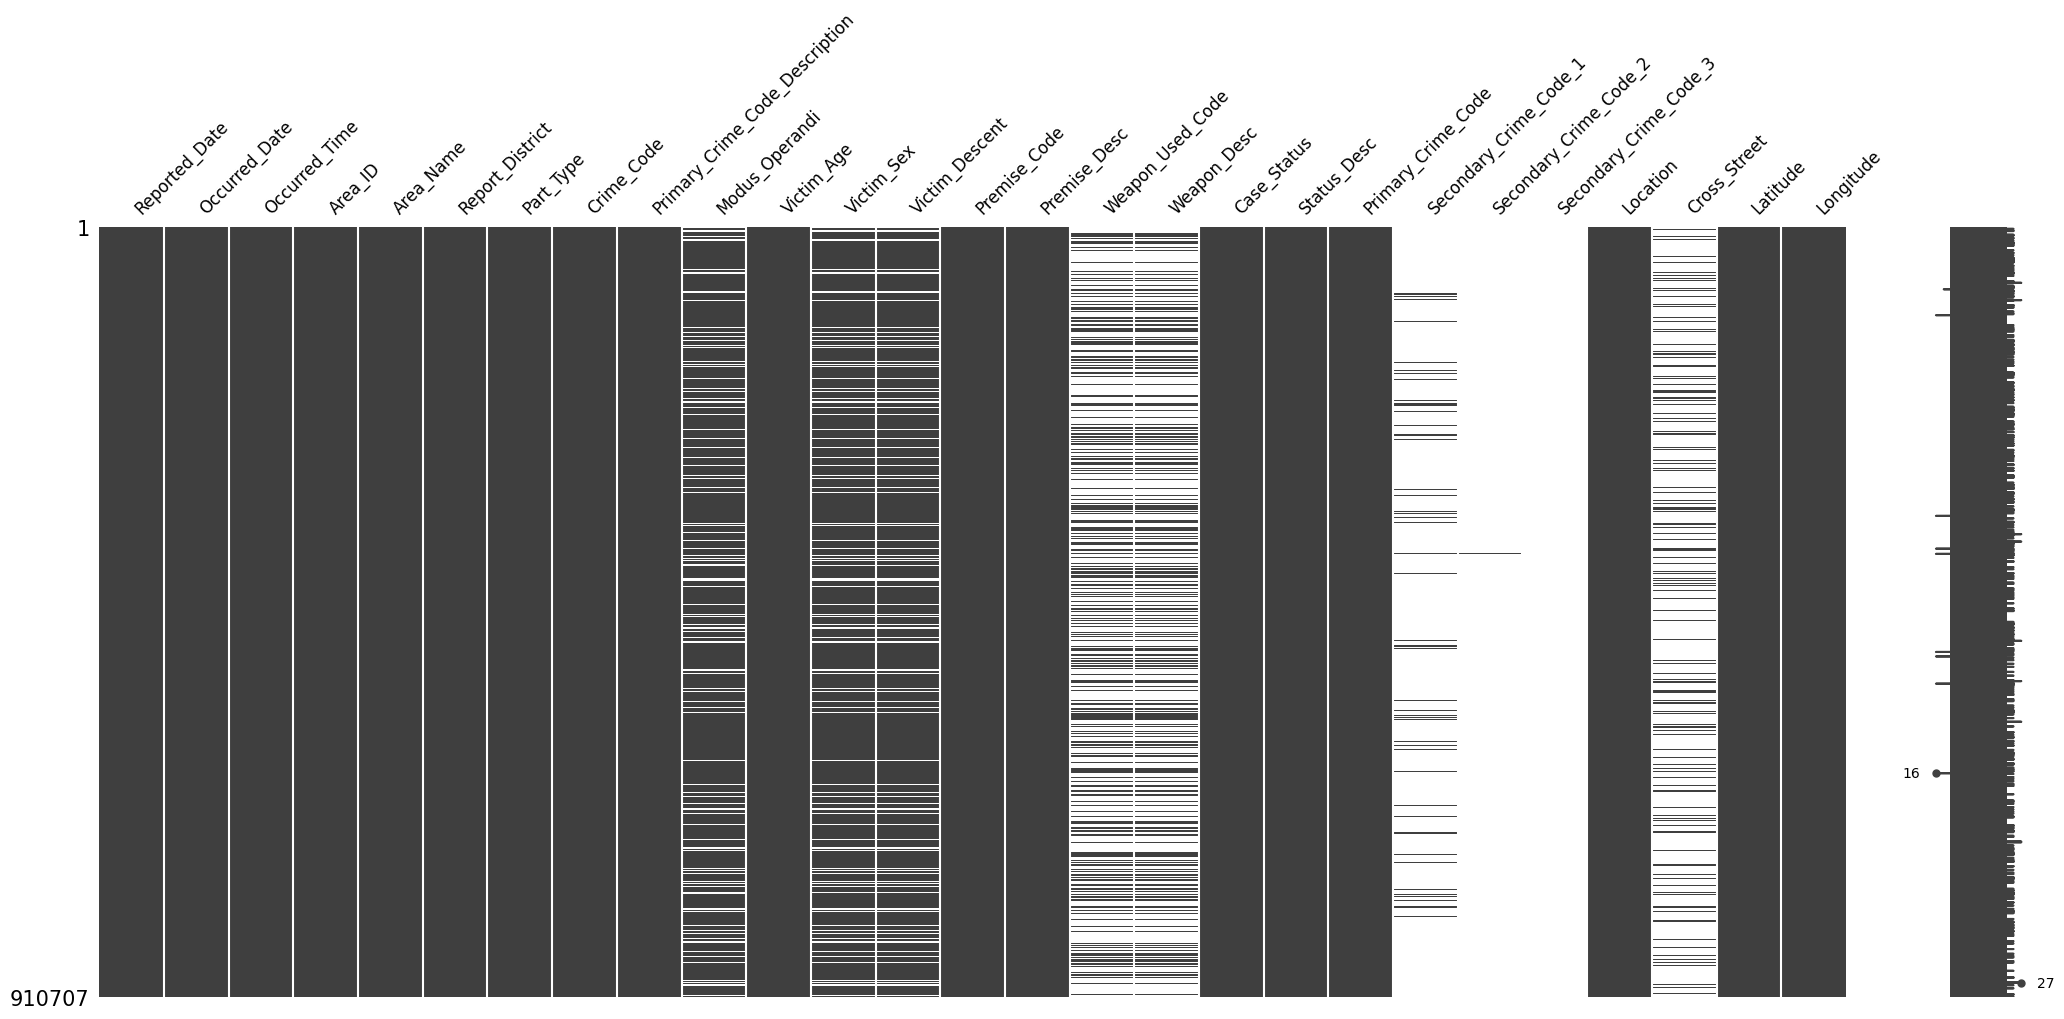

In [5]:
missingno.matrix(data,fontsize=12)
plt.plot()

In [6]:
data.describe()

,Occurred_Time,Area_ID,Report_District,Part_Type,Crime_Code,Victim_Age,Premise_Code,Weapon_Used_Code,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Latitude,Longitude
count,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910697.000000,315247.000000,910696.000000,66335.000000,2237.000000,64.00000,910707.000000,910707.000000
mean,1337.042061,10.698686,1116.307327,1.410830,500.809825,29.588992,306.502891,363.475262,500.552370,957.968222,983.913724,991.21875,33.989025,-118.059907
std,652.903148,6.102210,610.237433,0.491985,207.606033,21.851962,217.329569,123.700805,207.397779,110.627785,52.032905,27.06985,1.700407,5.894676
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.429600
50%,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058600,-118.321600
75%,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.163400,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


<h3>Area_ID & Area_Name</h3>
<p>These two columns provide the same information, therefore we can remove one without any information loss.</p>

In [7]:
data[["Area_ID","Area_Name"]].drop_duplicates().sort_values(by=["Area_ID"])

,Area_ID,Area_Name
Division_Record_Number,,
200106753,1,Central
230204214,2,Rampart
200320258,3,Southwest
200412582,4,Hollenbeck
220508440,5,Harbor
220614831,6,Hollywood
190326475,7,Wilshire
230808643,8,West LA
200907217,9,Van Nuys


<p>I chose to keep the Area name because it has more meaning.</p>

In [8]:
data = data.drop("Area_ID",axis=1)
print("Area_ID deleted successfully.")

Area_ID deleted successfully.


<h3>Crime codes</h3>

<p>The dataset has five columns pertaining to the crimes committed.</p> 
<ul>
    <li>Crime_Code : Indicates the crime committed. (Same as Primary_Crime_Code) </li> 
    <li>Primary_Crime_Code : Indicates the primary and most serious crime committed</li> 
    <li>Secondary_Crime_Code_1 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li> 
    <li>Secondary_Crime_Code_2 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li> 
    <li>Secondary_Crime_Code_3 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li>
</ul>
<p>From the meta-data provided we are told that Crime_Code and Primary_Crime_Code should be equal, which is not the case as shown in what follows.</p>

In [9]:
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
equal_values = {}
for i in range(len(columns)):
    equal_values[columns[i]] = data.loc[data[columns[i]] == data["Crime_Code"]].shape[0]
print("Values that equal Crime code for each column :")
equal_values

Values that equal Crime code for each column :


{'Primary_Crime_Code': 908828,
 'Secondary_Crime_Code_1': 1865,
 'Secondary_Crime_Code_2': 14,
 'Secondary_Crime_Code_3': 0}

<p>We remark that there are some values of Secondary_Crime_Code_1 and Secondary_Crime_Code_2 which are equal to Crime_Code. I assume that these are incorrect inputs from the reporting officers, and that these values should be swapped with the ones in the Primary_Crime_Code column.</p>

In [10]:
modified_Secondary_Crime_Code_1 = data.apply(lambda row : row["Primary_Crime_Code"] if row["Crime_Code"] == row["Secondary_Crime_Code_1"] else row["Secondary_Crime_Code_1"],axis=1) 
modified_Secondary_Crime_Code_2 = data.apply(lambda row : row["Primary_Crime_Code"] if row["Crime_Code"] == row["Secondary_Crime_Code_2"] else row["Secondary_Crime_Code_2"],axis=1) 
data["Secondary_Crime_Code_1"] = modified_Secondary_Crime_Code_1
data["Secondary_Crime_Code_2"] = modified_Secondary_Crime_Code_2
data["Primary_Crime_Code"] = data["Crime_Code"]

<p>After swapping the values, we check again and we have solved the issue.</p>

In [11]:
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
equal_values = {}
for i in range(len(columns)):
    equal_values[columns[i]] = data.loc[data[columns[i]] == data["Crime_Code"]].shape[0]
equal_values

{'Primary_Crime_Code': 910707,
 'Secondary_Crime_Code_1': 0,
 'Secondary_Crime_Code_2': 0,
 'Secondary_Crime_Code_3': 0}

<p>we then drop the Crime_Code column, and make all of the crime codes types as string.</p>

In [12]:
#data.drop("Crime_Code",inplace=True, axis=1)
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
data[columns] = data[columns].astype("float").astype("string")
data[columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 910707 entries, 190326475 to 240104953
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Primary_Crime_Code      910707 non-null  string
 1   Secondary_Crime_Code_1  66324 non-null   string
 2   Secondary_Crime_Code_2  2237 non-null    string
 3   Secondary_Crime_Code_3  64 non-null      string
dtypes: string(4)
memory usage: 34.7 MB


<p>Now to check the values of these columns.</p>

In [13]:
data[["Primary_Crime_Code","Primary_Crime_Code_Description"]].value_counts()

Primary_Crime_Code  Primary_Crime_Code_Description                    
510.0               VEHICLE - STOLEN                                      97716
624.0               BATTERY - SIMPLE ASSAULT                              72353
354.0               THEFT OF IDENTITY                                     56254
330.0               BURGLARY FROM VEHICLE                                 56134
310.0               BURGLARY                                              55862
                                                                          ...  
904.0               FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
906.0               FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
884.0               FAILURE TO DISPERSE                                       3
445.0               DISHONEST EMPLOYEE ATTEMPTED THEFT                        2
926.0               TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64

<p>For all the values in the primary code column we have their corresponding description.</p>
<p>For the secondary crime codes most of them exist also as primary codes, therefore can get their corresponding descriptions, but for those that don't exist as primary codes we don't have a description, and for now we have no way to find out.</p>

In [14]:
Primary_Crime_Code_unique_values = data["Primary_Crime_Code"].unique()
columns = ["Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3"]
results = {}
for column in columns:
    unique_values = data[column].dropna().unique()
    common_values = []
    uncommon_values = []
    for value in unique_values:
         if value in Primary_Crime_Code_unique_values:
              common_values.append(value)
         else: uncommon_values.append(value)
    results[column] = { "common" : len(common_values),"uncommon" : len(uncommon_values)}
results

{'Secondary_Crime_Code_1': {'common': 111, 'uncommon': 18},
 'Secondary_Crime_Code_2': {'common': 36, 'uncommon': 5},
 'Secondary_Crime_Code_3': {'common': 4, 'uncommon': 2}}

<h3>Date & Time Formatting</h3>

<p>Our dataset has two columns of type date :</p>
<ul>
    <li>Reported_Date : The date the report was filed by the officer.</li>
    <li>Occurred_Date : The date the crime was committed.</li>
</ul>
<p>We are only interested in the day month and year since the time for all the values is fixed at 12:00:00 AM.</p>

In [15]:
data[["Reported_Date","Occurred_Date"]].head(5)

,Reported_Date,Occurred_Date
Division_Record_Number,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM


In [16]:
data["Reported_Date"].apply(lambda x : x[-11:]).unique()

array(['12:00:00 AM'], dtype=object)

In [17]:
data["Occurred_Date"].apply(lambda x : x[-11:]).unique()

array(['12:00:00 AM'], dtype=object)

In [21]:
data["Reported_Date"] = pd.to_datetime(data["Reported_Date"].apply(lambda date : date[:10]),format="%m/%d/%Y")
data["Occurred_Date"] = pd.to_datetime(data["Occurred_Date"].apply(lambda date : date[:10]),format="%m/%d/%Y")
data[["Reported_Date","Occurred_Date"]]

,Reported_Date,Occurred_Date
Division_Record_Number,,
190326475,2020-03-01,2020-03-01
200106753,2020-02-09,2020-02-08
200320258,2020-11-11,2020-11-04
200907217,2023-05-10,2020-03-10
220614831,2022-08-18,2020-08-17
...,...,...
242106032,2024-02-20,2024-02-17
241604246,2024-01-08,2024-01-08
242004546,2024-01-16,2024-01-16


<p>We verify that the occurence date is always before the report date.</p>

In [22]:
data.loc[data["Reported_Date"] < data["Occurred_Date"]].empty

True

<p>For data visualisation we add a couple of columns.</p>

In [23]:
data["Occurred_Day"] = data["Occurred_Date"].dt.day_name()
data["Occurred_Month"] = data["Occurred_Date"].dt.month_name()
data["Occurred_Trimester"] = (data["Occurred_Date"].dt.month - 1) // 3 + 1
data["Occurred_Year"] = data["Occurred_Date"].dt.year
data["Occurence_Report_Difference"] = (data["Reported_Date"]-data["Occurred_Date"]).dt.days
columns = ["Occurred_Date","Reported_Date","Occurence_Report_Difference","Occurred_Day","Occurred_Month","Occurred_Trimester","Occurred_Year"]
data[columns]

,Occurred_Date,Reported_Date,Occurence_Report_Difference,Occurred_Day,Occurred_Month,Occurred_Trimester,Occurred_Year
Division_Record_Number,,,,,,,
190326475,2020-03-01,2020-03-01,0,Sunday,March,1,2020
200106753,2020-02-08,2020-02-09,1,Saturday,February,1,2020
200320258,2020-11-04,2020-11-11,7,Wednesday,November,4,2020
200907217,2020-03-10,2023-05-10,1156,Tuesday,March,1,2020
220614831,2020-08-17,2022-08-18,731,Monday,August,3,2020
...,...,...,...,...,...,...,...
242106032,2024-02-17,2024-02-20,3,Saturday,February,1,2024
241604246,2024-01-08,2024-01-08,0,Monday,January,1,2024
242004546,2024-01-16,2024-01-16,0,Tuesday,January,1,2024


<p>Our dataset also has a column for time of occurrence:</p>
<ul>
    <li>Occurred_Time</li>
</ul>
<p>We will extract from this column the hour of occurrence.</p>

In [24]:
data["Occurred_Time"] = data["Occurred_Time"].astype("string").str.zfill(4)
data["Occurred_Hour"] =data["Occurred_Time"].str.slice(0,2)
columns = ["Occurred_Date","Reported_Date","Occurence_Report_Difference","Occurred_Day","Occurred_Month","Occurred_Trimester","Occurred_Year"]+["Occurred_Time","Occurred_Hour"]
data[columns]

,Occurred_Date,Reported_Date,Occurence_Report_Difference,Occurred_Day,Occurred_Month,Occurred_Trimester,Occurred_Year,Occurred_Time,Occurred_Hour
Division_Record_Number,,,,,,,,,
190326475,2020-03-01,2020-03-01,0,Sunday,March,1,2020,2130,21
200106753,2020-02-08,2020-02-09,1,Saturday,February,1,2020,1800,18
200320258,2020-11-04,2020-11-11,7,Wednesday,November,4,2020,1700,17
200907217,2020-03-10,2023-05-10,1156,Tuesday,March,1,2020,2037,20
220614831,2020-08-17,2022-08-18,731,Monday,August,3,2020,1200,12
...,...,...,...,...,...,...,...,...,...
242106032,2024-02-17,2024-02-20,3,Saturday,February,1,2024,2330,23
241604246,2024-01-08,2024-01-08,0,Monday,January,1,2024,0800,08
242004546,2024-01-16,2024-01-16,0,Tuesday,January,1,2024,1510,15


<h3>Victim age and sex and descent</h3>

<p>Our dataset has three columns which provide info about the victim of the crime :</p>
<ul>
    <li>Victim_Age : the victim's age</li>
    <li>Victim_Sex : the victim's sex, F - Female M - Male X - Unknown</li>
    <li>Victim_Descent : the victim's ethnicity , A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian</li>
</ul>
<p>For the Victim's age we observe that there are some negative values, since they represent a small sample of the dataset we choose to remove them.</p>

In [26]:
data["Victim_Age"].describe()

count    910707.000000
mean         29.588992
std          21.851962
min          -4.000000
25%           0.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Victim_Age, dtype: float64

In [33]:
data[data["Victim_Age"] < 0][["Victim_Age","Victim_Sex","Victim_Descent"]].drop_duplicates()

KeyError: "['Victim_Sexe'] not in index"